In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd

In [2]:
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 

-- Select all progenitors of a particular galaxy


select *

from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des

where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid

In [83]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [92]:
data['DHaloID'],data['LastProgenitorID'],data['mdhalo']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49]),
 array([45.515327 , 45.51487  , 45.514416 , 45.513958 , 45.513504 ,
        45.51305  , 45.512592 , 45.51214  , 45.51168  , 45.511227 ,
        45.510773 , 45.510315 , 42.606804 , 42.60638  , 42.605953 ,
        39.984447 , 39.984047 , 38.58023  , 38.579845 , 38.579456 ,
        37.831097 , 37.83072  , 37.83034  , 36.332836 , 36.332474 ,
        36.33211  , 32.025017 , 32.024693 , 30.151905 , 28.279398 ,
        28.279116 , 27.249083 , 24.720818 , 21.162727 , 21.162518 ,
        19.009    , 19.00881  , 15.825068 ,  9.925783 ,  7.3975906,
         7.397517 ,  6.8356805,  5.337449 ,  3.4646597

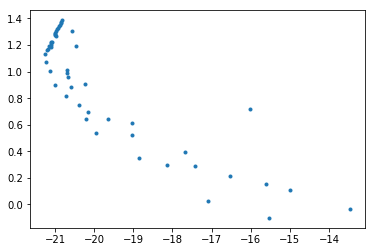

In [18]:
plt.plot(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],".")

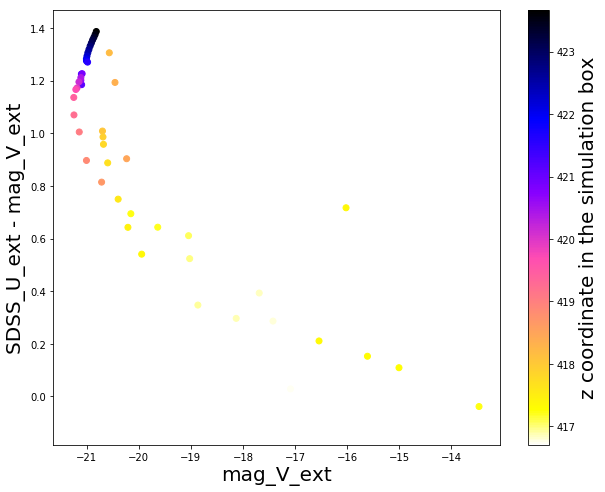

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['z'],cmap='gnuplot2_r')
plt.colorbar(label='z coordinate in the simulation box')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

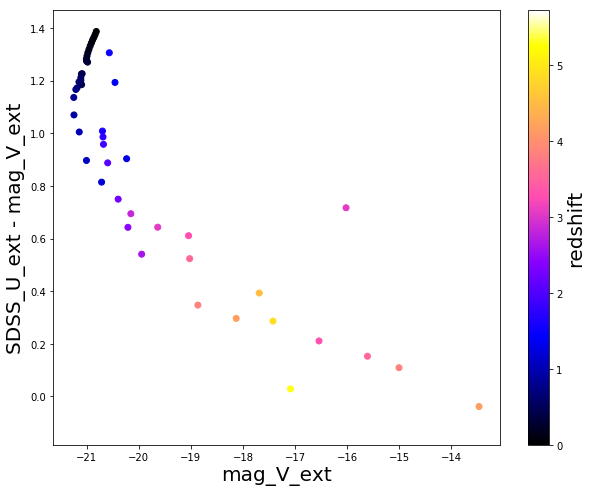

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()

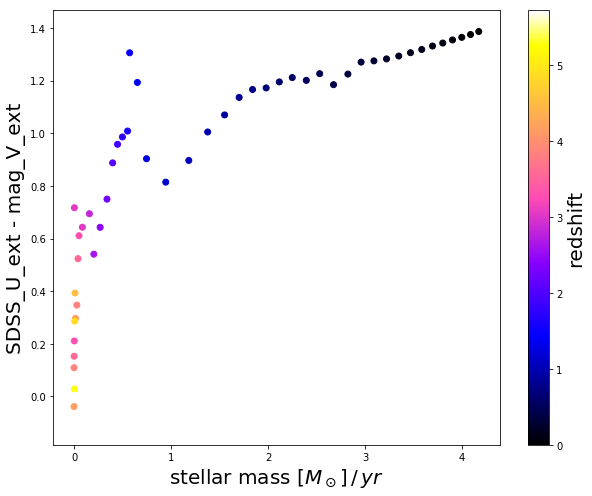

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(data['stellarmass'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel(r"stellar mass $[M_\odot]\,/\,yr$")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmass_progenitor_evolution.png')
plt.show()

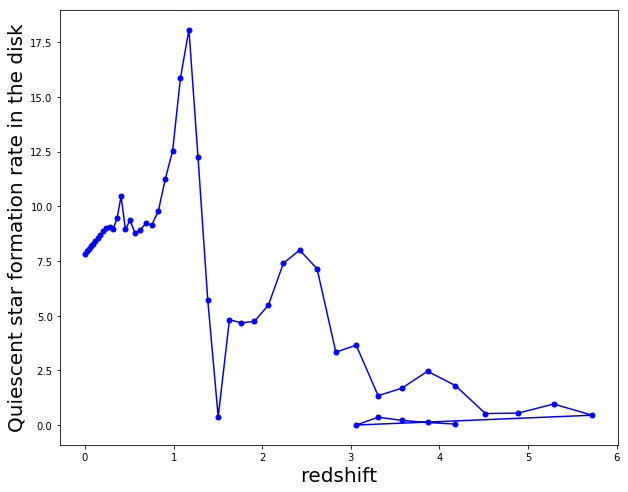

In [53]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfr'],color='b')
plt.plot(data['redshift'],data['sfr'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Quiescent star formation rate in the disk")
plt.savefig('../plots/005/SFH_progenitor_quiescent.png')
plt.show()

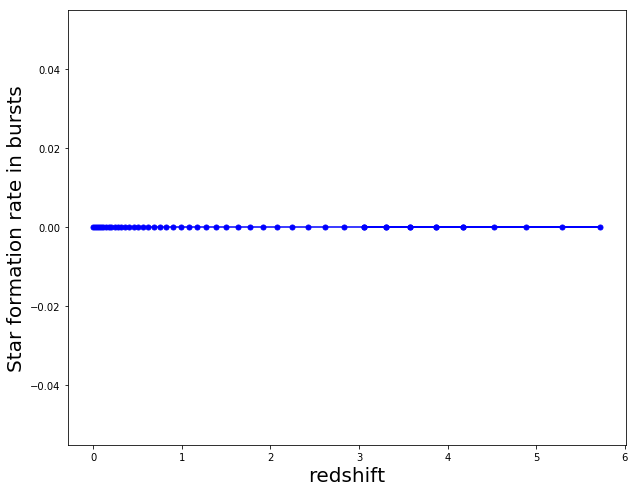

In [40]:
plt.figure(figsize=(10,8))
plt.plot(data['redshift'],data['sfrbulge'],color='b')
plt.plot(data['redshift'],data['sfrbulge'],'.',markersize=10,color='b')
plt.xlabel(r"redshift")
plt.ylabel("Star formation rate in bursts")
plt.savefig('../plots/005/SFH_progenitor_bursts.png')
plt.show()

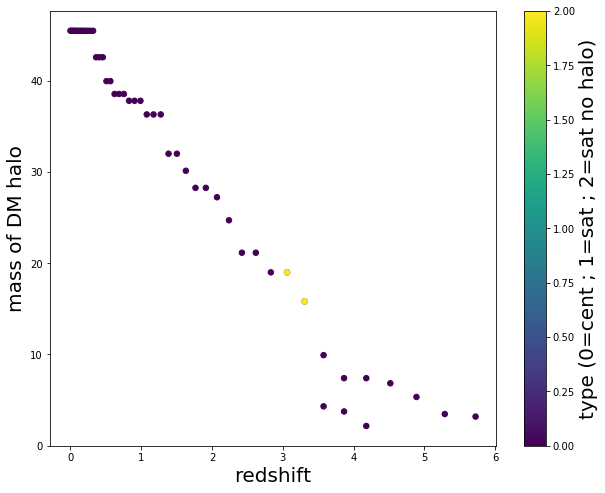

In [50]:
plt.figure(figsize=(10,8))
#plt.plot(data['redshift'],data['mdhalo'],color='b')
plt.scatter(data['redshift'],data['mdhalo'],s=30,c=data['type'])
plt.xlabel(r"redshift")
plt.ylabel("mass of DM halo")
plt.colorbar(label='type (0=cent ; 1=sat ; 2=sat no halo)')
plt.savefig('../plots/005/mdhalo_progenitor.png')
plt.show()

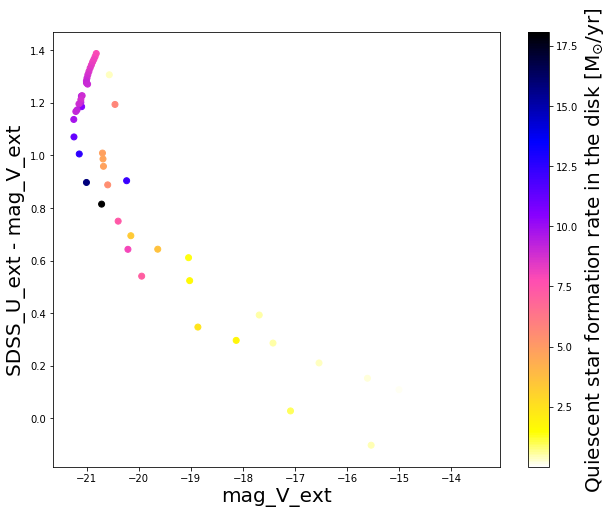

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['sfr'],cmap='gnuplot2_r')
plt.colorbar(label=r'Quiescent star formation rate in the disk [M$_{\odot}/\rm{yr}$]')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_sfr.png')
plt.show()

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([ 0.  ,  0.49,  0.98,  1.47,  1.96,  2.45,  2.94,  3.43,  3.92,
         4.41,  4.9 ,  5.39,  5.88,  6.37,  6.86,  7.35,  7.84,  8.33,
         8.82,  9.31,  9.8 , 10.29, 10.78, 11.27, 11.76, 12.25, 12.74,
        13.23, 13.72, 14.21, 14.7 , 15.19, 15.68, 16.17, 16.66, 17.15,
        17.64, 18.13, 18.62, 19.11, 19.6 , 20.09, 20.58, 21.07, 21.56,
        22.05, 22.54, 23.03, 23.52, 24.01, 24.5 , 24.99, 25.48, 25.97,
        26.46, 26.95, 27.44, 27.93, 28.42, 28.91, 29.4 , 29.89, 30.38,
        30.87, 31.36, 31.85, 32.34, 32.83, 33.32, 33.

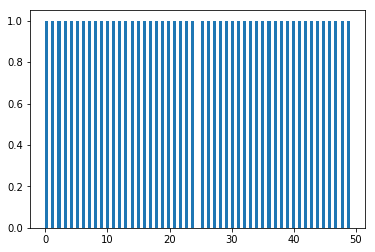

In [82]:
plt.hist(data['galaxyid'],bins=100)

In [89]:
############# Change galaxyid

ss_1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid ,prog.DHaloID "
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 30 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data_30 = vdb.execute_query(ss)

In [90]:
data_30['DHaloID']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

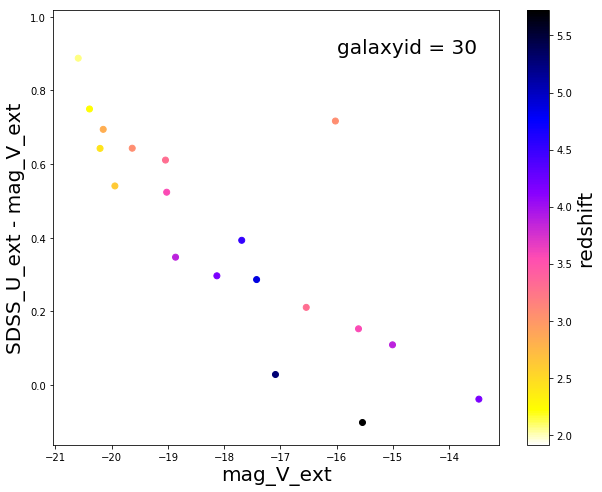

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(data_30['mag_V_ext'],data_30['SDSS_u_ext']-data_30['mag_V_ext'],c=data_30['redshift'],cmap='gnuplot2_r')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.text(-16.,0.9,'galaxyid = 30')
plt.savefig('../plots/005/colmag_progenitor_evolution_30.png')
plt.show()

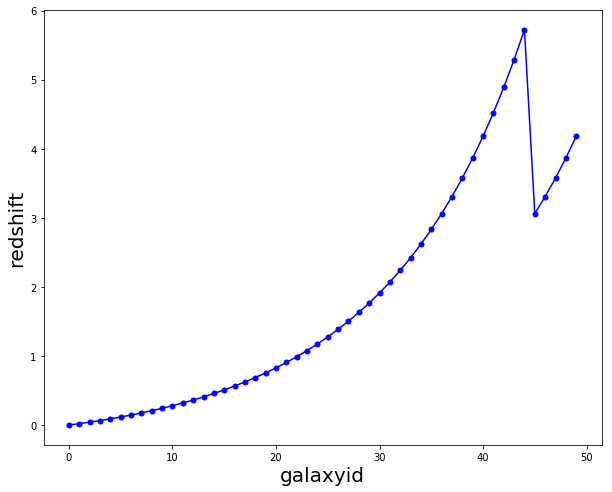

In [77]:
plt.figure(figsize=(10,8))
plt.plot(data['galaxyid'],data['redshift'],c='b')
plt.plot(data['galaxyid'],data['redshift'],'.',markersize=10,c='b')
plt.xlabel('galaxyid')
plt.ylabel('redshift')
plt.savefig('../plots/005/galaxyid_redshift.png')
plt.show()

In [81]:
len(data['galaxyid'][np.where(data['galaxyid']==2)])

1

In [97]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift,prog.sfr,prog.sfrbulge,prog.galaxyid,prog.DescendantID,prog.LastProgenitorID,prog.DHaloID,prog.snapnum "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.MainLeafID"

ss= ss_1 + ss_2 + ss_3

data_ = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [99]:
data_['galaxyid']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

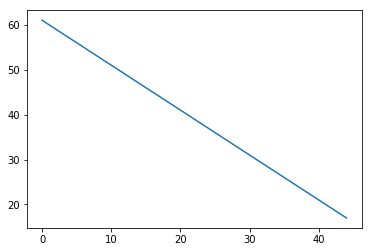

In [100]:
plt.plot(data_['galaxyid'],data_['snapnum'])

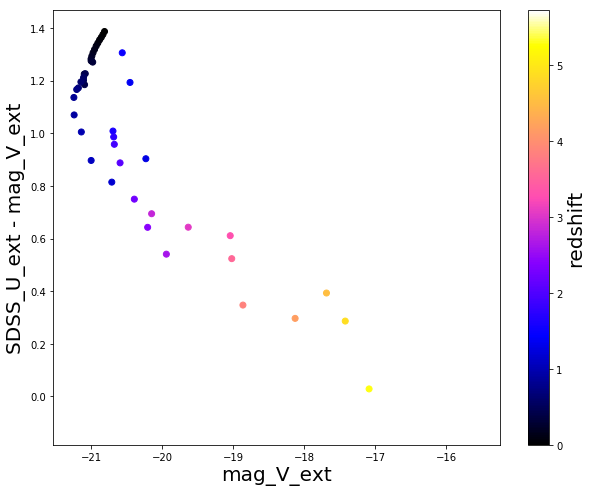

In [101]:
plt.figure(figsize=(10,8))
plt.scatter(data_['mag_V_ext'],data_['SDSS_u_ext']-data_['mag_V_ext'],c=data_['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()